In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Dell\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train = pd.read_csv('sign_mnist_train/sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test/sign_mnist_test.csv')

In [3]:
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [4]:
test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


In [5]:
labels = train['label'].values

In [6]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<AxesSubplot:ylabel='count'>

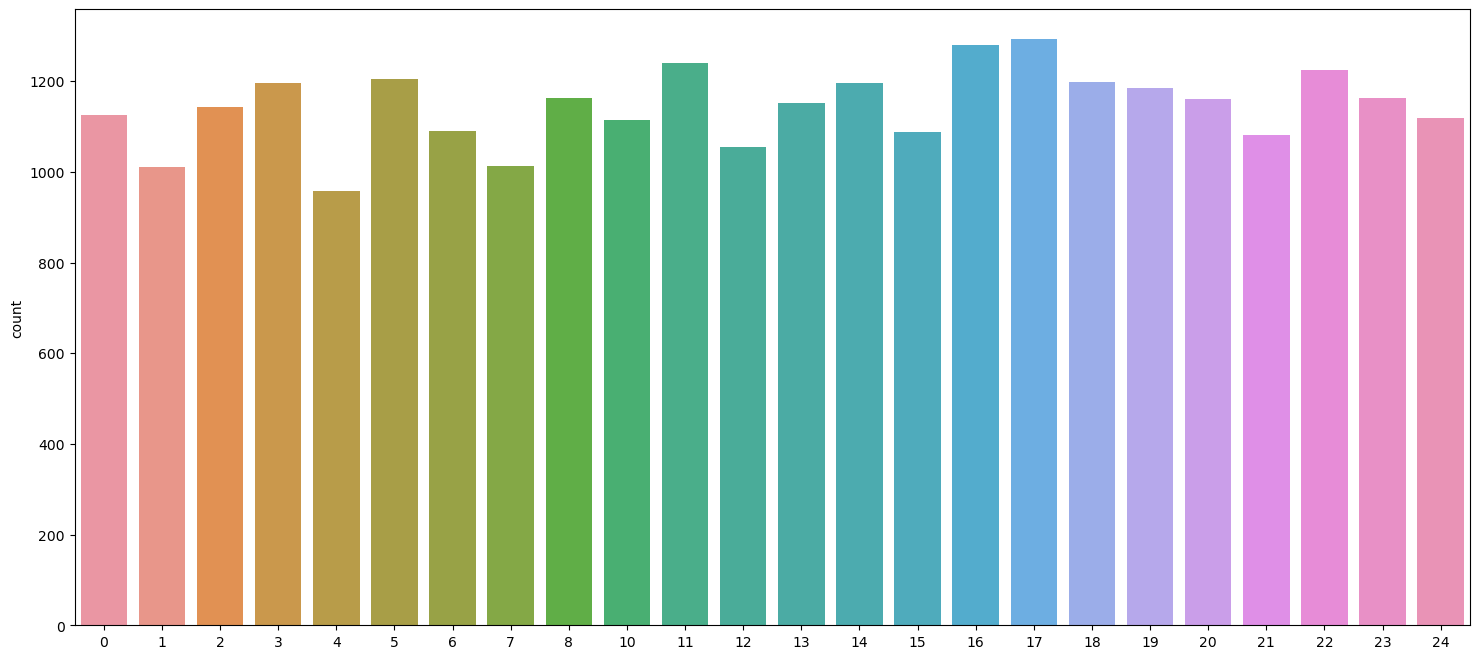

In [7]:
plt.figure(figsize=(18,8))
sns.countplot(x=labels)

In [8]:
train.drop('label', axis=1, inplace=True)

In [9]:
images = train.values
images = np.array([np.reshape(i,(28,28)) for i in images])
images = np.array([i.flatten() for i in images])

In [10]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)

In [11]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [12]:
len(labels[0])

24

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


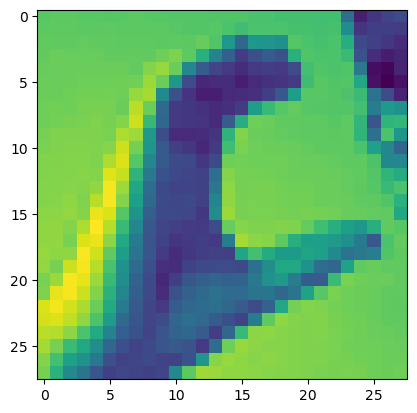

In [13]:
index = 2
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [14]:
import cv2
import numpy as np

for i in range(0,10):
    rand = np.random.randint(0, len(images))
    input_img = images[rand]
    sample = input_img.reshape(28,28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx=10, fy=10, interpolation=cv2.INTER_CUBIC)
    cv2.imshow("Sample image", sample)
    cv2.waitKey(0)

cv2.destroyAllWindows()

In [15]:
#splitting our data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels,test_size=0.3, random_state=101)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size=128
num_classes=24
epochs=10

In [17]:
x_train = x_train/255
x_test = x_test/255

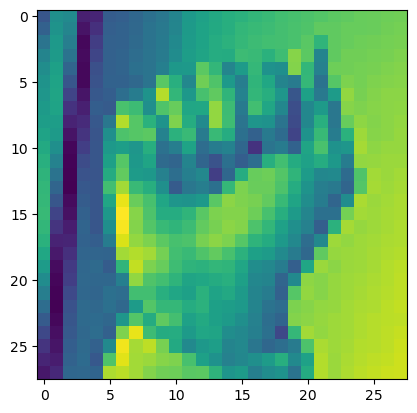

In [18]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

plt.imshow(x_train[0].reshape(28,28))

In [19]:
# Creating CNN Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [20]:
# Compile our model
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(),
             metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)          0

In [22]:
# Train our model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
151/151 [==============================] - 26s 153ms/step - loss: 2.6306 - accuracy: 0.1915 - val_loss: 1.7330 - val_accuracy: 0.4639
Epoch 2/10
151/151 [==============================] - 22s 147ms/step - loss: 1.2914 - accuracy: 0.5670 - val_loss: 0.8293 - val_accuracy: 0.7313
Epoch 3/10
151/151 [==============================] - 22s 147ms/step - loss: 0.7535 - accuracy: 0.7458 - val_loss: 0.4817 - val_accuracy: 0.8414
Epoch 4/10
151/151 [==============================] - 23s 153ms/step - loss: 0.4762 - accuracy: 0.8375 - val_loss: 0.2949 - val_accuracy: 0.9142
Epoch 5/10
151/151 [==============================] - 23s 155ms/step - loss: 0.3202 - accuracy: 0.8956 - val_loss: 0.1869 - val_accuracy: 0.9461
Epoch 6/10
151/151 [==============================] - 24s 158ms/step - loss: 0.2317 - accuracy: 0.9218 - val_loss: 0.1260 - val_accuracy: 0.9626
Epoch 7/10
151/151 [==============================] - 24s 157ms/step - loss: 0.1526 - accuracy: 0.9515 - val_loss: 0.0859 - val_ac

In [23]:
#saving our model
model.save("sign_mnist_cnn_50_epochs.keras")
print("Model Saved")

Model Saved


In [24]:
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Accuracy')
# plt.xlabel('epoch')
# plt.ylabel('accuracy')
# plt.legend(['train','test'])

# plt.show()

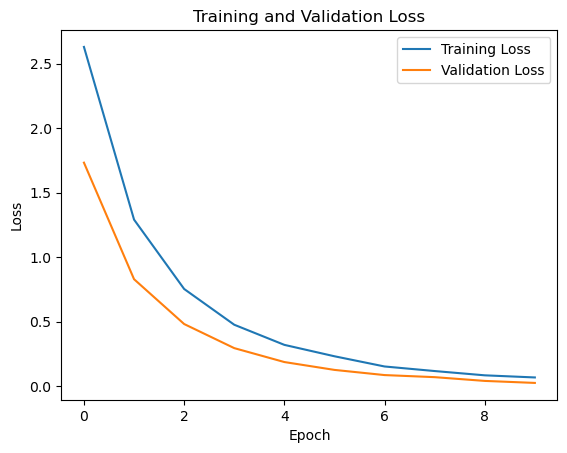

In [25]:
# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

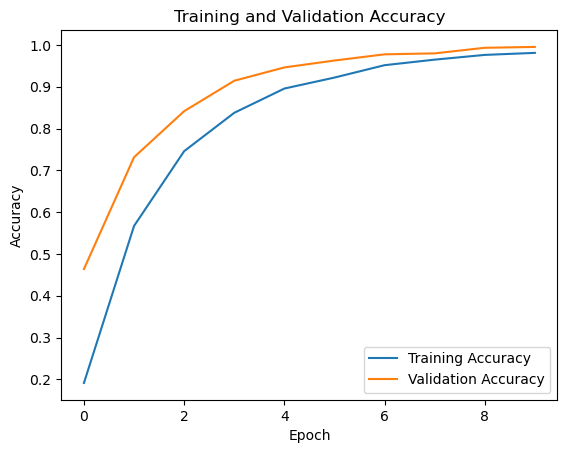

In [26]:
# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
test.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [28]:
# Reshaping our test data

test_labels = test['label']
test.drop('label', axis=1, inplace=True)

test_images = test.values
test_images = np.array([np.reshape(i, (28,28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

test_labels = label_binarizer.fit_transform(test_labels)
test_images = test_images.reshape(test_images.shape[0],28,28,1)

test_images.shape

(7172, 28, 28, 1)

In [29]:
y_predict = model.predict(test_images)

225/225 [==============================] - 4s 14ms/step


In [30]:
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_predict.round())

0.8252928053541551

In [31]:
# Function to match label

def getLetter(result):
    classLabels = { 0: 'A',
                  1: 'B',
                  2: 'C',
                  3: 'D',
                  4: 'E',
                  5: 'F',
                  6: 'G',
                  7: 'H',
                  8: 'I',
                  9: 'K',
                  10: 'L',
                  11: 'M',
                  12: 'N',
                  13: 'O',
                  14: 'P',
                  15: 'Q',
                  16: 'R',
                  17: 'S',
                  18: 'T',
                  19: 'U',
                  20: 'V',
                  21: 'W',
                  22: 'X',
                  23: 'Y'
                  }
    
    try:
        res = int(result)
        return classLabels[res]
    except:
        return "Error"

In [32]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    
    roi = frame[100:400, 320:620]
    cv2.imshow('roi', roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation = cv2.INTER_AREA)
    
    cv2.imshow('roi scaled and gray', roi)
    copy = frame.copy()
    cv2.rectangle(copy, (320,100), (620,400), (255,0,0), 5)
    
    roi = roi.reshape(1,28,28,1)
    roi = roi/255
#     result = str(model.predict_classes(roi, 1, verbose=0)[0])

    result = str(np.argmax(model.predict(roi, verbose=0), axis=-1)[0])

    predicted_letter = getLetter(result)
    
    cv2.putText(copy, predicted_letter, (300,100), cv2.FONT_HERSHEY_COMPLEX, 2, (0,255,0), 2)
    cv2.imshow('frame', copy)
    
    if cv2.waitKey(1) == 13: #enter key
        break
        
cap.release()
cv2.destroyAllWindows()